# Open data 

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from iminuit import cost, Minuit
from scipy import integrate

In [67]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6) # inches
plt.rcParams['font.size'] = 20
plt.rcParams['figure.dpi'] = 500

In [3]:
columns = ['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets']
for i in range (1,39):
    columns.append( 'jet' + str(i) + '_pt' )
    columns.append( 'jet' + str(i) + '_eta' )
    columns.append( 'jet' + str(i) + '_phi' )
    columns.append( 'jet' + str(i) + '_E' )
    columns.append( 'jet' + str(i) + '_DL1R' )
    
print (columns)

['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_E', 'jet1_DL1R', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_E', 'jet2_DL1R', 'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_E', 'jet3_DL1R', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_E', 'jet4_DL1R', 'jet5_pt', 'jet5_eta', 'jet5_phi', 'jet5_E', 'jet5_DL1R', 'jet6_pt', 'jet6_eta', 'jet6_phi', 'jet6_E', 'jet6_DL1R', 'jet7_pt', 'jet7_eta', 'jet7_phi', 'jet7_E', 'jet7_DL1R', 'jet8_pt', 'jet8_eta', 'jet8_phi', 'jet8_E', 'jet8_DL1R', 'jet9_pt', 'jet9_eta', 'jet9_phi', 'jet9_E', 'jet9_DL1R', 'jet10_pt', 'jet10_eta', 'jet10_phi', 'jet10_E', 'jet10_DL1R', 'jet11_pt', 'jet11_eta', 'jet11_phi', 'jet11_E', 'jet11_DL1R', 'jet12_pt', 'jet12_eta', 'jet12_phi', 'jet12_E', 'jet12_DL1R', 'jet13_pt', 'jet13_eta', 'jet13_phi', 'jet13_E', 'jet13_DL1R', 'jet14_pt', 'jet14_eta', 'jet14_phi', 'jet14_E', 'jet14_DL1R', 'jet15_pt', 'jet15_eta', 'jet15_phi', 'jet15_E', 'jet15_DL1R', 'jet16_pt', 'jet

In [4]:
data = pd.read_csv('yyjets.csv', header = None, names = columns)

In [5]:
data.head()

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6,76765.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4,617620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3,38342.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3,56719.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3,37675.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6,76765.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4,617620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3,38342.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3,56719.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3,37675.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,52418.1,0.538881,2.277290,60215.0,32398.6,2.093090,-1.787410,133372.0,3,49831.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410715,76719.5,1.071630,-1.941890,125152.0,52648.7,1.139720,1.202260,90708.1,3,30260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410716,53319.7,-0.808535,-1.011990,71718.5,30222.4,-2.236130,1.495430,143010.0,3,69401.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410717,46443.0,0.675326,-2.353120,57442.2,33971.1,-0.278737,0.863282,35299.3,3,54267.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
photons = data.drop(data.columns[np.arange(9, 199)], axis=1)
photons

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3
...,...,...,...,...,...,...,...,...,...
1410714,52418.1,0.538881,2.277290,60215.0,32398.6,2.093090,-1.787410,133372.0,3
1410715,76719.5,1.071630,-1.941890,125152.0,52648.7,1.139720,1.202260,90708.1,3
1410716,53319.7,-0.808535,-1.011990,71718.5,30222.4,-2.236130,1.495430,143010.0,3
1410717,46443.0,0.675326,-2.353120,57442.2,33971.1,-0.278737,0.863282,35299.3,3


# Plot photon bck variables

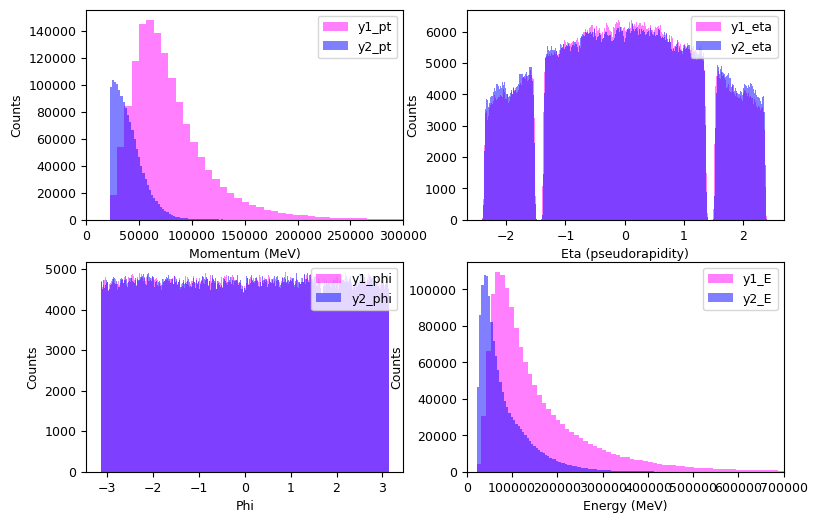

In [8]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['y1_pt'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_pt')
axs[0, 0].hist(data['y2_pt'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_pt');
axs[0,0].set_xlabel('Momentum (MeV)')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_xlim(0, 0.3e6)
axs[0,0].legend()

axs[0, 1].hist(data['y1_eta'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_eta')
axs[0, 1].hist(data['y2_eta'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_eta');
axs[0,1].set_xlabel('Eta (pseudorapidity)')
axs[0,1].set_ylabel('Counts')
axs[0,1].legend()

axs[1, 0].hist(data['y1_phi'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_phi')
axs[1, 0].hist(data['y2_phi'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_phi');
axs[1,0].set_xlabel('Phi')
axs[1,0].set_ylabel('Counts')
axs[1,0].legend()

axs[1, 1].hist(data['y1_E'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_E')
axs[1, 1].hist(data['y2_E'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_E');
axs[1,1].set_xlabel('Energy (MeV)')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_xlim(0, 0.7e6)
axs[1,1].legend();

# 4 Mom 

In [8]:
def fomy(x, num):
    
    string = 'y' + str(num) + '_'
    E = x[string + 'E']
    px = abs(x[string + 'pt']) * np.cos(x[string + 'phi'])
    py = abs(x[string + 'pt']) * np.sin(x[string + 'phi'])
    pz = x[string + 'pt']/(np.tan(2*np.arctan(np.exp(-x[string + 'eta']))))

    return np.array([E, px, py, pz])

In [9]:
data['y1_fom'] = data.apply(lambda x: fomy(x, 1), axis = 1).apply(lambda x: x)
data['y2_fom'] = data.apply(lambda x: fomy(x, 2), axis = 1).apply(lambda x: x)
data = data.assign(H_fom = data.y1_fom + data.y2_fom)

In [10]:
###### Make a cut 

In [11]:
data 

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R,y1_fom,y2_fom,H_fom
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6,76765.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[213308.0, -44057.27832885351, 12102.788877524...","[34920.5, 29819.171029934147, -17005.915466317...","[248228.5, -14238.10729891936, -4903.126588792..."
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4,617620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[313606.0, -235999.23562961674, 139531.9426734...","[121821.0, -15108.518335849534, 23214.47560672...","[435427.0, -251107.75396546628, 162746.4182802..."
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3,38342.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[33795.0, 13250.211584489956, 27380.6279001459...","[96920.1, 24056.392259962413, -12292.063026393...","[130715.1, 37306.60384445237, 15088.5648737527..."
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3,56719.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[111409.0, 37985.67955711484, -40239.487830167...","[244523.0, -32355.382420262093, 32743.66968252...","[355932.0, 5630.297136852747, -7495.8181476379..."
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3,37675.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[69358.5, 9428.591113217211, -61051.4291778641...","[65849.8, -10006.492188281882, 46829.441312553...","[135208.3, -577.9010750646703, -14221.98786531..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,52418.1,0.538881,2.277290,60215.0,32398.6,2.093090,-1.787410,133372.0,3,49831.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[60215.0, -34028.29493067203, 39871.4478257461...","[133372.0, -6963.226030216267, -31641.47223521...","[193587.0, -40991.5209608883, 8229.97559052744..."
1410715,76719.5,1.071630,-1.941890,125152.0,52648.7,1.139720,1.202260,90708.1,3,30260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[125152.0, -27821.166440636076, -71497.3032927...","[90708.1, 18966.716421532485, 49113.6363943372...","[215860.1, -8854.450019103591, -22383.66689839..."
1410716,53319.7,-0.808535,-1.011990,71718.5,30222.4,-2.236130,1.495430,143010.0,3,69401.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[71718.5, 28268.743901622987, -45209.164185090...","[143010.0, 2275.5955844449613, 30136.607746991...","[214728.5, 30544.339486067947, -15072.55643809..."
1410717,46443.0,0.675326,-2.353120,57442.2,33971.1,-0.278737,0.863282,35299.3,3,54267.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[57442.2, -32739.038436622603, -32940.97161963...","[35299.3, 22079.405001722233, 25817.3490114675...","[92741.5, -10659.63343490037, -7123.6226081636..."


## Mass dist.

C:\Users\s1974479\AppData\Local\Temp\ipykernel_12952\3012877311.py:4: RuntimeWarning: invalid value encountered in sqrt
  H_mass.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)


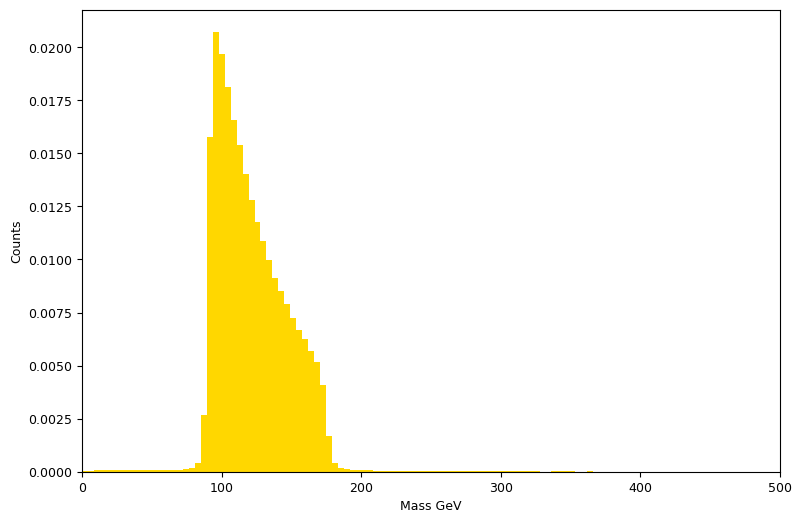

In [12]:
H_mass = []

for row in data.H_fom:
    H_mass.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)

n, bins, patches = plt.hist(H_mass, bins = 500, color = 'gold', density = True)
plt.xlim(0, 500)
plt.xlabel('Mass GeV')
plt.ylabel('Counts');

In [13]:
print (min(H_mass))
print (max(H_mass))

0.01767833955070497
2128.3956617999406


In [14]:
H_array = np.array(H_mass)
vals1 = (100 < H_array)
H_array = H_array[vals1]
vals2 = (160 > H_array)
H_array = H_array[vals2]

In [15]:
len(H_array)

976323

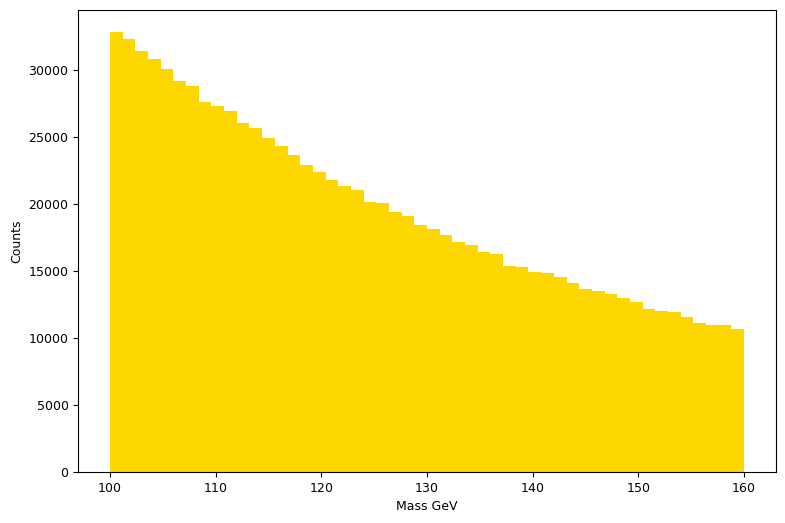

In [29]:
n, bins, patches = plt.hist(H_array, bins = 0, color = 'gold')
plt.xlabel('Mass GeV')
plt.ylabel('Counts');

## Fitting to bck (2nd/5th order polynomial)

In [17]:
def pdf_2nd(x, a, b, c):
    
    """
    Pdf with 2nd order polynomial
    """
    
    up = H_array.min()
    down = H_array.max()
    
    function = lambda x: (a*x**2 + b*x + c)
    area = integrate.quad(function, up, down)[0]
    
    
    
    return (a*x**2 + b*x + c) / area

In [18]:
def pdf_5th(x, a, b, c, d, e, f):
    
    """
    Pdf with 5th order polynomial
    """
    
    up = H_array.min()
    down = H_array.max()
    
    function = lambda x: (a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f)
    area = integrate.quad(function, up, down)[0]
    
    
    
    return (a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f) / area

In [19]:
def like_5th(a, b, c, d, e, f):
    
    """
    Likelihood function for 5th order polynomial
    """
    
    
    return -np.sum(np.log(pdf_5th(H_array, a, b, c, d, e, f)))

In [20]:
def like_2nd(a, b, c):
    
    """
    Likelihood function for 2nd order polynomial
    """
    
    
    return -np.sum(np.log(pdf_2nd(H_array, a, b, c)))

In [62]:
c_combined_2nd = cost.UnbinnedNLL(n, pdf_2nd)

m_comb_2nd = Minuit(c_combined_2nd, a = 484, b = -171652, c = 16366636.784191051)
m_comb_2nd.migrad()

C:\Users\s1974479\AppData\Local\Temp\ipykernel_12952\1152783334.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  area = integrate.quad(function, up, down)[0]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1914                      │              Nfcn = 315              │
│ EDM = nan (Goal: 0.0002)         │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 3.4582e2  │    nan    │            │            │         │         │       │
│ 1 │ b    │ -1.7165e5 │    nan    │            │            │         │         │       │
│ 2 │ c    │ 1.6367e7  │    nan    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │   a   b   c │
├───┼─────────────┤
│ a │ nan nan nan │
│ b │ nan nan nan │
│ c │ nan nan nan │
└───┴─────────────┘

In [64]:
m_comb_2nd.fval / (len(n) - len(m_comb_2nd.values))

-40.71335233453553

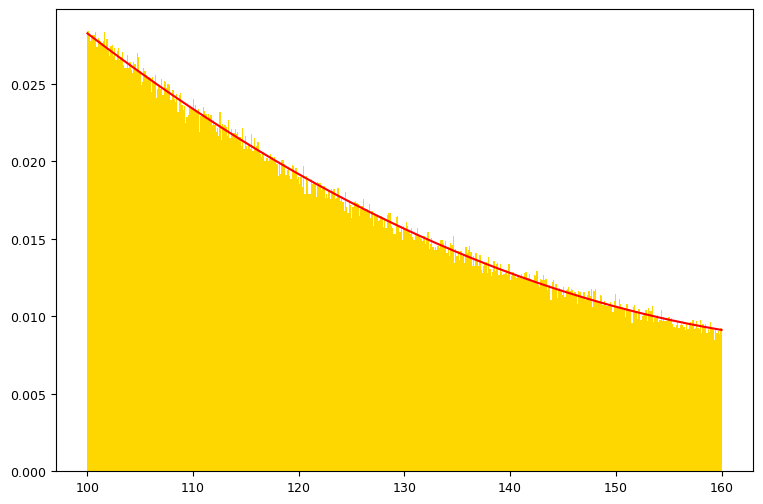

In [22]:
n2, bins2, patches2 = plt.hist(H_array, bins = 500, color = 'gold');

x2 = bins2
y2 = pdf_2nd(x2, *m_comb_2nd.values)

plt.plot(x2, y2, 'red');

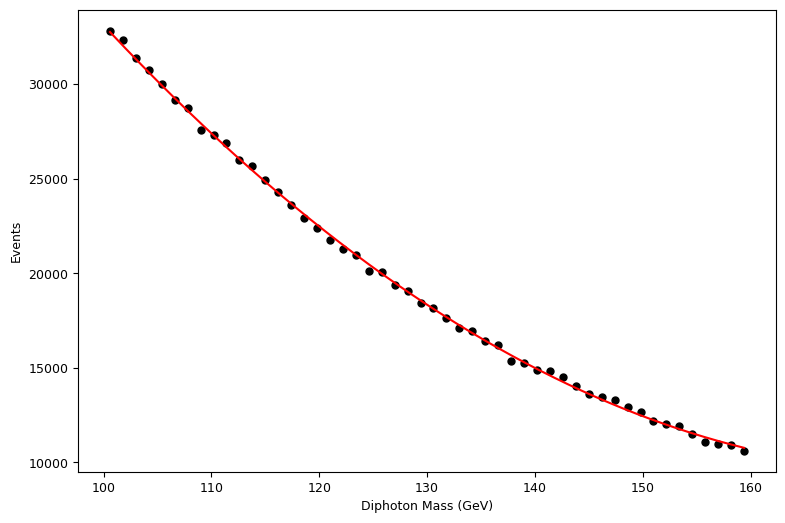

In [56]:
xcenters = (bins[:-1] + bins[1:]) / 2
scale = (bins[1] - bins[0])* sum(n)
x_array = np.arange(xcenters[0], xcenters[-1], 0.01)

plt.plot(xcenters, n, color = 'black', linestyle = '', marker = 'o', markersize = 5)

plt.plot(x_array, scale * pdf_2nd(x_array, *m_comb_2nd.values), color = 'red')
plt.xlabel('Diphoton Mass (GeV)')
plt.ylabel('Events');

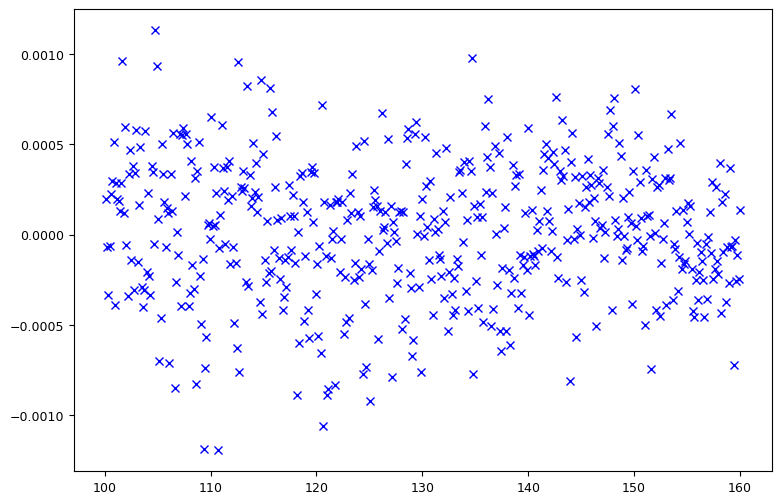

In [23]:
res2 = n2 - y2[1:]
plt.plot(x2[1:], res2, 'bx');

In [24]:
m_comb_5th = Minuit(like_5th, a = 0.01, b = 0.01, c = 0.1, d = 91, e = -33000, f = 3321837)

m_comb_5th.migrad()  # run optimiser
m_comb_5th.hesse()   # run covariance estimator

print(m_comb_5th.values)  # print estimated values
print(m_comb_5th.errors) 

C:\Users\s1974479\AppData\Local\Temp\ipykernel_12952\1936052136.py:8: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(pdf_5th(H_array, a, b, c, d, e, f)))
C:\Users\s1974479\AppData\Local\Temp\ipykernel_12952\1480886225.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  area = integrate.quad(function, up, down)[0]


<ValueView a=-3.363339350998184e-05 b=0.010638083563390185 c=-0.3826848352084346 d=-62.29961223538256 e=-20599.35421963817 f=3321837.599021612>
<ErrorView a=1.2041755204268162e-07 b=2.1683791994351922e-05 c=0.003524944239208348 d=0.5395090702932714 e=80.25389421832523 f=12501.247834505511>


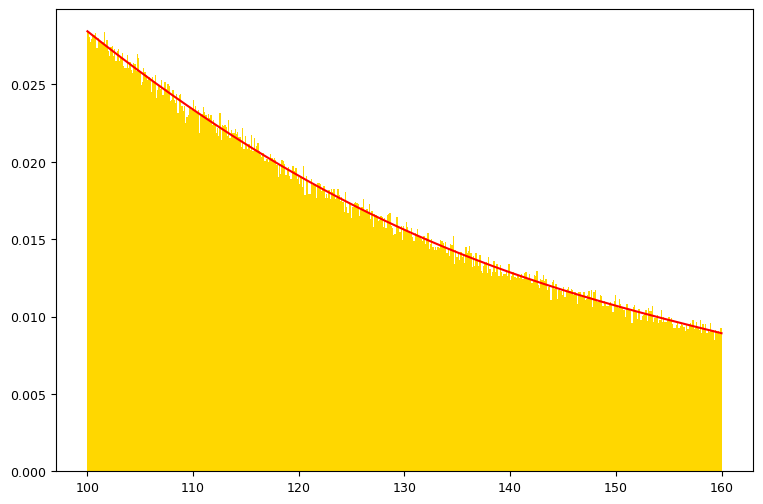

In [25]:
n5, bins5, patches5 = plt.hist(H_array, bins = 500, color = 'gold', density = True);

x5 = bins5
y5 = pdf_5th(x5, *m_comb_5th.values)

plt.plot(x5, y5, 'red');

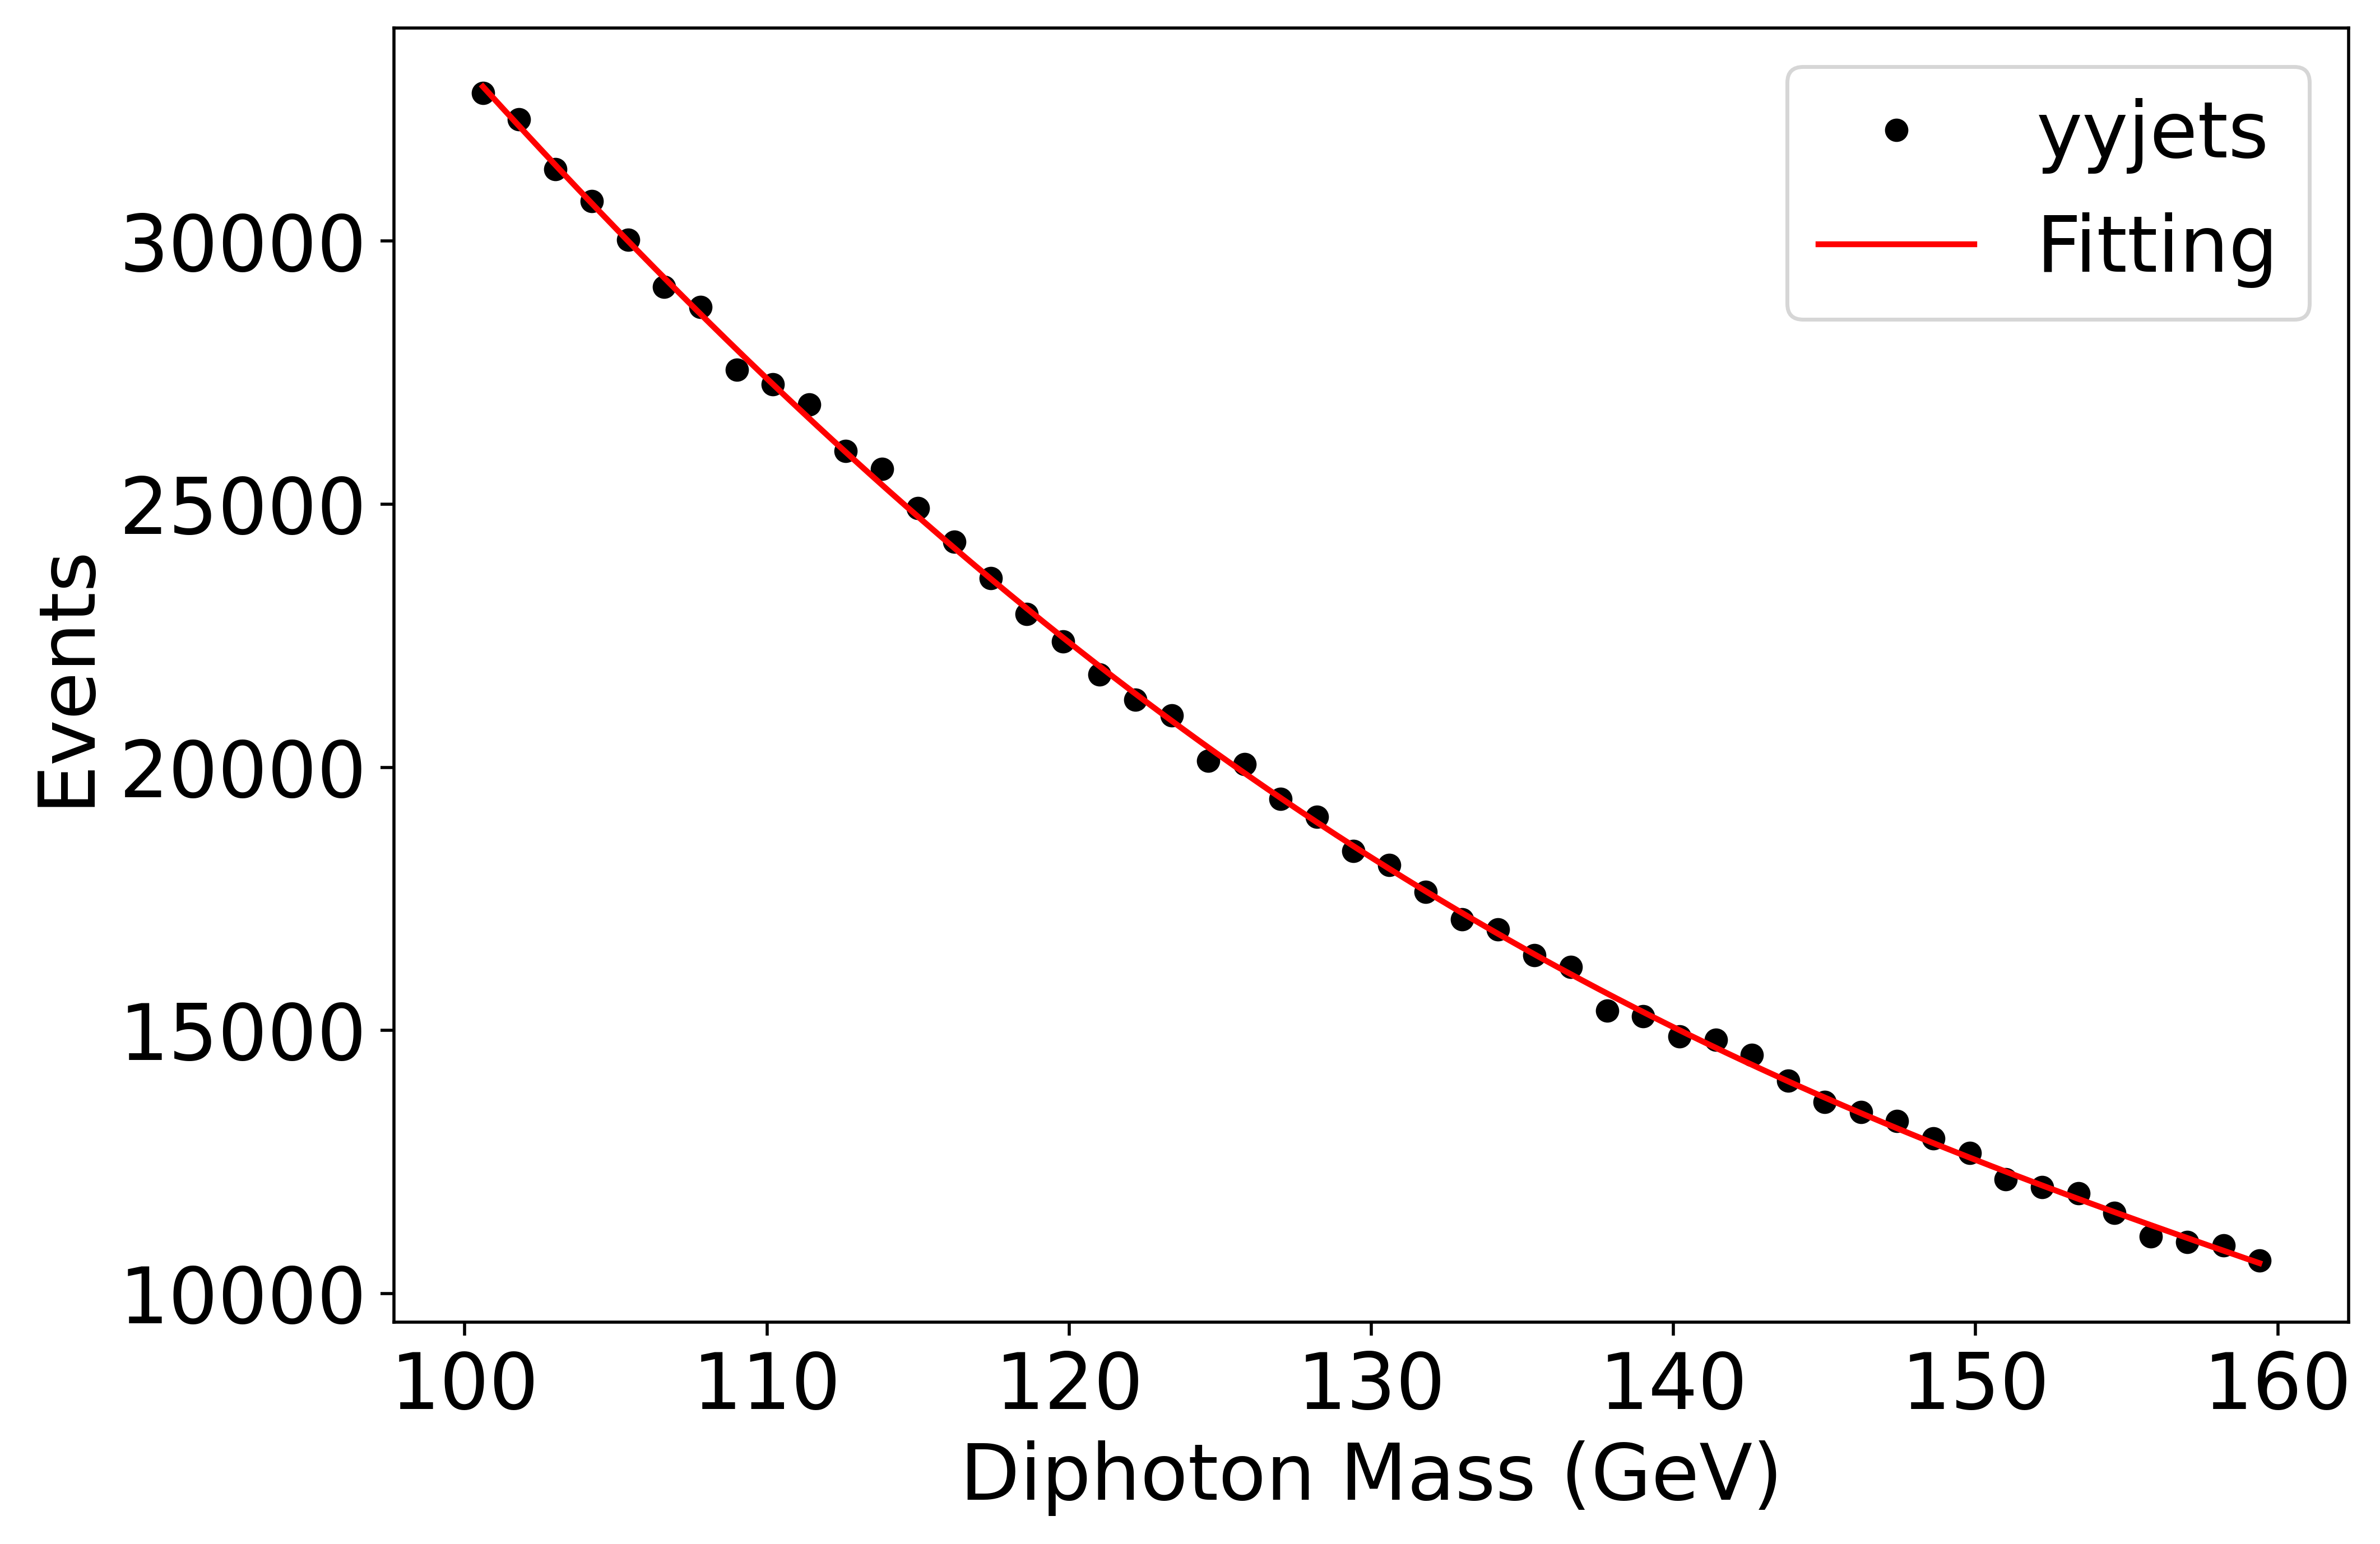

In [69]:
xcenters = (bins[:-1] + bins[1:]) / 2
scale = (bins[1] - bins[0])* sum(n)
x_array = np.arange(xcenters[0], xcenters[-1], 0.01)

plt.plot(xcenters, n, color = 'black', linestyle = '', marker = 'o', markersize = 5, label = 'yyjets')

plt.plot(x_array, scale * pdf_5th(x_array, *m_comb_5th.values), color = 'red', label = 'Fitting')
plt.xlabel('Diphoton Mass (GeV)')
plt.ylabel('Events')
plt.legend();

In [32]:
m_comb_5th.fval / (sum(n) - len(m_comb_2nd.values))

4.038677930157412

In [40]:
m_comb_5th.fval

3943042.036771285

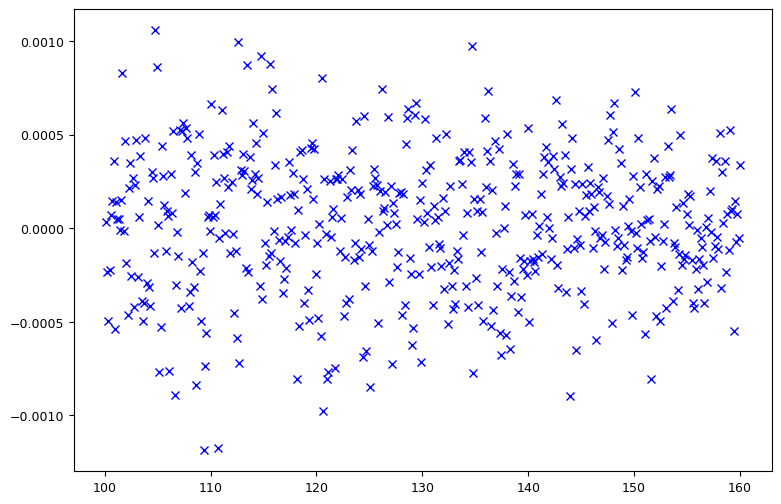

In [26]:
res = n5 - y5[1:]
plt.plot(x5[1:], res, 'bx')

In [ ]:
data.describe()['Njets'][['min', 'max']]

In [ ]:
n, bins, patches = plt.hist(data['Njets'], bins = 40, color = 'blue');

In [ ]:
pts = np.array([])

for i in range(1,39):
    string = 'jet' + str(i) + '_pt'
    array = np.array(data[string])
    pts = np.append(pts, array)

In [ ]:
n, bins, patches = plt.hist(pts, bins = 1000, color = 'blue', alpha = 0.8)
plt.xlabel('jet pt')
plt.xlim(0, 0.5*1e6)
plt.ylabel('Counts');

In [ ]:
dl1rs = np.array([])

for i in range(1,39):
    string = 'jet' + str(i) + '_DL1R'
    array = np.array(data[string])
    dl1rs = np.append(dl1rs, array)

In [ ]:
plt.hist(dl1rs, bins = 300, color = 'blue')
plt.xlabel('jet DL1R')
plt.ylabel('Counts');

## Reshape data 

In [ ]:
datacut = data.drop(data.columns[np.arange(0, 9)], axis = 1)
datacut = datacut.drop(datacut.columns[np.arange(190, 193)], axis = 1)
datacut

In [ ]:
d_array = datacut.values
d_array_f = np.nan_to_num(d_array, nan = -9000)
data_array_r = d_array_f.reshape(1410719, 38, 5)
for i in range(1410719):
    data_array_r[i] = data_array_r[i, :, :][data_array_r[i, :, 4].argsort()[::-1]]

In [ ]:
columns_sorted = []

for i in range (1,39):
    columns_sorted.append( 'jet' + str(i) + '_pt' )
    columns_sorted.append( 'jet' + str(i) + '_eta' )
    columns_sorted.append( 'jet' + str(i) + '_phi' )
    columns_sorted.append( 'jet' + str(i) + '_E' )
    columns_sorted.append( 'jet' + str(i) + '_DL1R' )

In [ ]:
data_sorted_DL1R = pd.DataFrame(data_array_r.reshape(1410719, 190), columns = columns_sorted)
data_sorted_DL1R

In [ ]:
##### sort by DL1R

In [ ]:
yyjets_sorted = photons.join(data_sorted_DL1R)
yyjets_sorted

In [ ]:
yyjets_sorted.to_csv('yyjets_SDL1R.csv', index = True)

In [ ]:
########

In [ ]:
b_jet_data = data_sorted_DL1R.drop(data_sorted_DL1R.columns[np.arange(5, 190)], axis=1)
b_jet_data

In [ ]:
other_jets = data_sorted_DL1R.drop(data_sorted_DL1R.columns[np.arange(0, 5)], axis=1)
other_jets


In [ ]:
oth_jets_array = other_jets.values.reshape(1410719, 37, 5)

In [ ]:
for i in range(1410719):
    oth_jets_array[i] = oth_jets_array[i, :, :][oth_jets_array[i, :, 0].argsort()[::-1]]

In [ ]:
oth_jets_sorted = pd.DataFrame(oth_jets_array.reshape(1410719, 185), columns = columns_sorted[5:])
oth_jets_sorted

## Join data sets

In [ ]:
jets3 = b_jet_data.join(oth_jets_sorted)
jets3

# Csv file 

In [ ]:
yyjets_sorted = photons.join(jets3)
yyjets_sorted

In [ ]:
yyjets_sorted.to_csv('yyjets_sorted.csv', index = True)

In [ ]:
jets3 = jets3.loc[jets3['jet1_DL1R'] > 0]

In [ ]:
def fomjets(x, num):
    
    string = 'jet' + str(num) + '_'
    E = x[string + 'E']
    px = abs(x[string + 'pt']) * np.cos(x[string + 'phi'])
    py = abs(x[string + 'pt']) * np.sin(x[string + 'phi'])
    pz = x[string + 'pt']/(np.tan(2*np.arctan(np.exp(-x[string + 'eta']))))

    return np.array([E, px, py, pz])

In [ ]:
for i in range (1,4):
    
    jets3['jet' + str(i) + '_fom'] = jets3.apply(lambda x: fomjets(x, i), axis = 1).apply(lambda x: x)

In [ ]:
jets3 = jets3.assign(quark_fom = jets3.jet1_fom + jets3.jet2_fom + jets3.jet3_fom)

In [ ]:
jets3 = jets3.assign(wboson_fom = jets3.jet2_fom + jets3.jet3_fom)

In [ ]:
jets3

In [ ]:
quark_m = []

for row in jets3.quark_fom:
    quark_m.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)

n, bins, patches = plt.hist(quark_m, bins = 5000, color = 'blue')
plt.xlim(0, 800)
plt.xlabel('Mass GeV')
plt.ylabel('Counts')
plt.title('Quark Mass');

In [ ]:
wboson_m = []

for row in jets3.wboson_fom:
    wboson_m.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)

n, bins, patches = plt.hist(wboson_m, bins = 5000, color = 'green')
plt.xlim(0, 800)
plt.xlabel('Mass GeV')
plt.ylabel('Counts')
plt.title('W boson Mass');